# Covid-19 infection in Portugal
Mathematical models base on: [Covid-19 infection in Italy](https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d)

# Data 

In [1]:
data = {
    'start' : '2020/03/02',
    'cases' : [
           2,    4,    6,    9,   13,   21,   30,   39,   41,   59,
          78,  112,  169,  245,  331,  448,  642,  785, 1020, 1280, 
        1600, 2060, 2362, 2995, 3544, 4268, 5170
    ]
}

# Models

In [2]:
from numpy import exp

# exponetial function
def exponential_model(x, a, b, c):
    return a * exp( b * (x - c))

# logistic function
def logistic_model(x, a, b, c):
    return c / (1 + exp(-(x - b) / a))

# Regressions 

## Exponential Fit

In [3]:
from scipy.optimize import curve_fit, fsolve
# prepare data
y_past = data['cases']
x_past = range(len(y_past))

# exponential fit
exponent_fit = curve_fit(exponential_model, x_past, y_past)
# exponential parameters
exp_a = exponent_fit[0][0]
exp_b = exponent_fit[0][1]
exp_c = exponent_fit[0][2]


## Multi-logistic Fit

In [4]:
log_e = [1]
log_a = 1
log_b = 1
log_c = 1
for i in range(2, len(x_past) + 1):
    try :
        # logistic fit
        logistic_fit = curve_fit(logistic_model, x_past[:i], y_past[:i], p0=[log_a, log_b, log_c])
        # logistic parameters
        log_a = logistic_fit[0][0]
        log_b = logistic_fit[0][1]
        log_c = logistic_fit[0][2]
        # logistic end day
        log_e.append(int(fsolve(lambda x : logistic_model(x, log_a, log_b, log_c) - int(log_c), log_b)))
    except:
        log_e.append(log_e[-1])

# Regression Results  

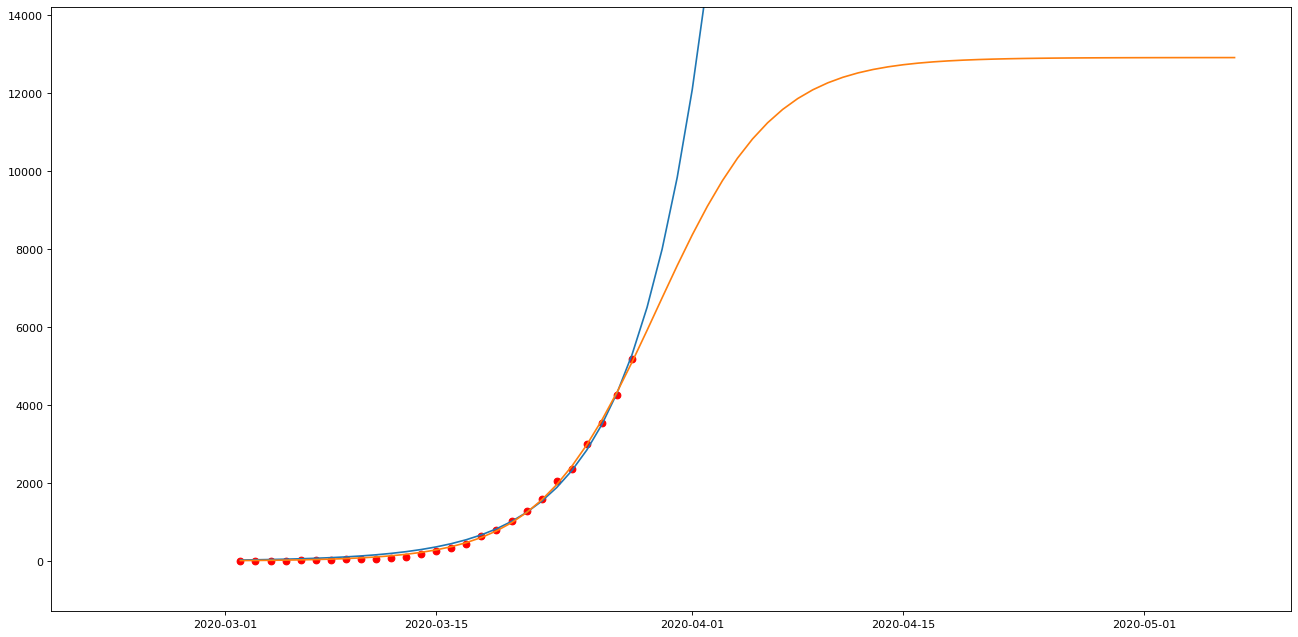

In [5]:
import matplotlib.pyplot as plt
import datetime          as dt
# figure
plt.figure('Regresion Results', figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

# start date
start_date = dt.datetime.strptime(data['start'], '%Y/%m/%d').date()

# epidemic duration
duration = log_e[-1]

# Limits
pad = 0.1 * log_c
plt.ylim((min(y_past) - pad, log_c + pad))

# Real data
plt.scatter(
    [start_date + dt.timedelta(days=x)         for x in x_past], y_past, label="Real data", color="red")

# Total range
x_total = range(duration) 

# Predicted exponetial curve     
plt.plot(
    [start_date + dt.timedelta(days=x)         for x in x_total],
    [exponential_model(x, exp_a, exp_b, exp_c) for x in x_total], label="Exponential model")

# Predicted logistic curve
plt.plot(
    [start_date + dt.timedelta(days=x)         for x in x_total],
    [logistic_model   (i, log_a, log_b, log_c) for i in x_total], label="Logistic model")

# show
plt.show()

# Forecast Evolution 
## End of Epidemic

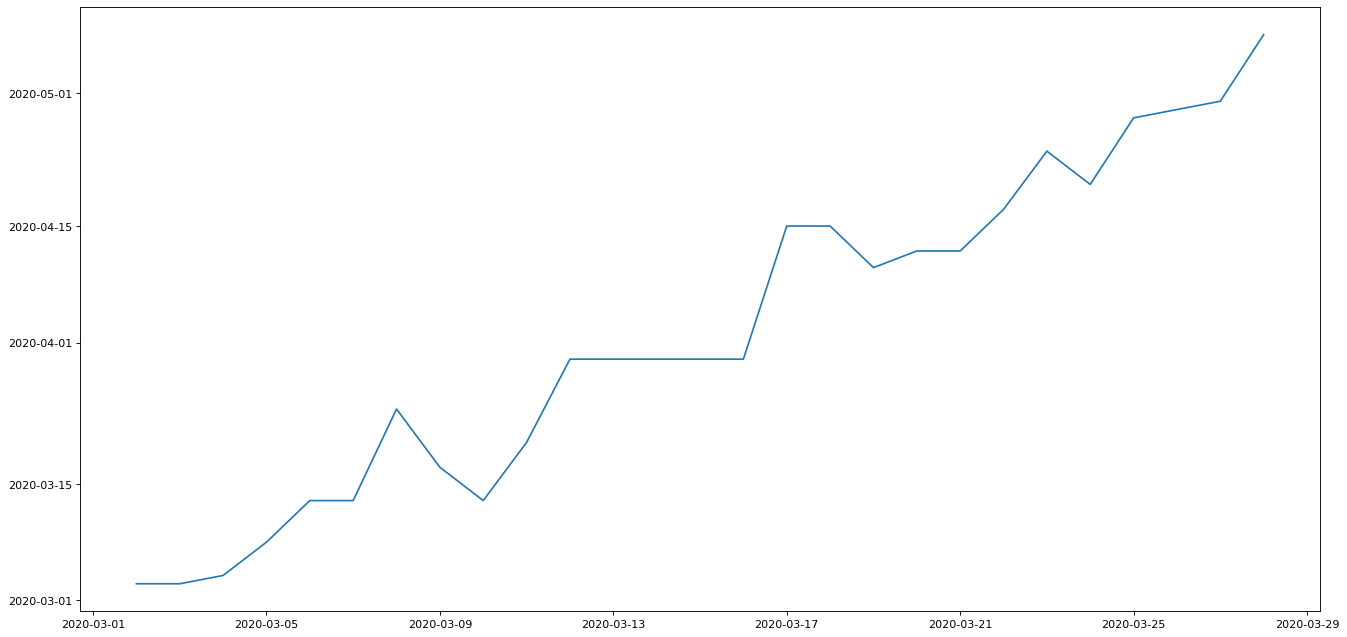

In [6]:
from IPython.display import Markdown, display

# figure
plt.figure('end of epidemic', figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

# end of epidemic evolution     
plt.plot(
    list(map(lambda x: start_date + dt.timedelta(days=x), x_past)),
    list(map(lambda y: start_date + dt.timedelta(days=y), log_e )) , label="End of Epidemic Evolution")

# show
plt.show()


# Forecast

In [7]:
# forcast
display(Markdown(f'## Next Days'))
for x in range(max(x_past) + 1, duration)[:5]:
    date  = start_date + dt.timedelta(days=x)
    cases = logistic_model(x, log_a, log_b, log_c)
    display(Markdown(f'- **{int(cases)}** cases on {date.strftime("%A, %d %B %Y")}'))

# conclusion
date  = start_date + dt.timedelta(days=duration)
cases = logistic_model(duration, log_a, log_b, log_c)
display(Markdown(f'## End of epidemic in **{date}** with **{int(cases)}** cases!'))

## Next Days

- **5919** cases on Sunday, 29 March 2020

- **6754** cases on Monday, 30 March 2020

- **7579** cases on Tuesday, 31 March 2020

- **8369** cases on Wednesday, 01 April 2020

- **9100** cases on Thursday, 02 April 2020

## End of epidemic in **2020-05-08** with **12917** cases!